## Notebook made by  

|** Name** | **Student id** | **email**|
|: |:-|:-| 
|Brandon Cchung|10800840|bctcchung@gmail.com|
|Sidney de Vries  |10724087 |sidney.de.vries96@gmail.com|

### Pledge (taken from [Coursera's Honor Code](https://www.coursera.org/about/terms/honorcode) )



Put here a selfie with your photo where you hold a signed paper with the following text: (if this is team work, put two selfies here). The link must be to some place on the web, not to a local file. 

> My answers to homework, quizzes and exams will be my own work (except for assignments that explicitly permit collaboration).

>I will not make solutions to homework, quizzes or exams available to anyone else. This includes both solutions written by me, as well as any official solutions provided by the course staff.

>I will not engage in any other activities that will dishonestly improve my results or dishonestly improve/hurt the results of others.

<img src='https://cloud.githubusercontent.com/assets/10861155/7042930/cf749982-dde5-11e4-9e8c-4c41080faf55.jpg'/><img src='https://github.com/sidneyd3vries/datascience/blob/master/foto.jpg?raw=true'/>

### Note
* **Assignments without the selfies or completely filled in information will not be graded and receive 0 points.**


 


# AssignmentWikipediaEditors

In deze opgave halen we een datafile op, die een naar formaat heeft. Het is een spreadsheet, maar het aantal kolommen is niet constant.
 

In [1]:
%matplotlib inline
import pandas as pd
import re
from lxml import etree 
from bz2file import BZ2File
import codecs
import nltk
from collections import defaultdict, Counter
from  itertools import combinations  # ideal for creating all possible pairs that out can make out of a set
from __future__ import division
from math import sqrt 

# N1

1. Haal de file <http://language.media.mit.edu/data/public/wikipedia_userlang_iso639-3.zip> op, en unzip hem.
    * Dit mag met de hand, maar natuurlijk liever in code in je notebook.
    * Sla de file `wikipedia_userlang_iso639-3.tsv` in dezelfde folder op als dit notebook
    * use a notebook magic command to show how large this file is.

In [2]:
ZIPNAME = "wikipedia.zip"
FILENAME = "wikipedia_userlang_iso639-3.tsv"

In [3]:
# Downloading file

import urllib

urllib.urlretrieve("http://language.media.mit.edu/data/public/wikipedia_userlang_iso639-3.zip", ZIPNAME)
print "%s downloaded" % ZIPNAME

wikipedia.zip downloaded


In [4]:
# Unzipping file

import zipfile

zfile = zipfile.ZipFile(ZIPNAME, 'r')
zfile.extractall("") # Extract to current location
zfile.close()

print "%s unzipped" % FILENAME

wikipedia_userlang_iso639-3.tsv unzipped


In [5]:
# Show file size

!ls -lh $FILENAME
# File explorer says 131M

-rwx------+ 1 Sidney Sidney 129M Feb 26 21:53 wikipedia_userlang_iso639-3.tsv


# N2

2. Bepaal de separator en bepaal hoeveel kolommen een regel maximaal heeft.
    * het maximaal aantal kolommen in een regel mag je ook in de code in de volgende vraag bepalen.

In [6]:
# Read first 5 lines of file
    
with open(FILENAME) as myfile:
    head = [next(myfile) for x in range(5)]
print head

# Here we can see the separator is \t, however the language code and amount of edits is separated by a comma

['! ! ! ! ! ! ! ! ! ! ! ! ! ! !\tzho,7\n', '! ! ! ! ! ! ! ! ! ! ! ! ! !\tzho,8\n', '! ! ! ! ! ! ! ! ! ! ! ! !\tzho,30\n', '! ! ! ! ! ! ! ! ! ! ! !\tzho,7\n', '! ! ! ! ! ! ! ! ! ! !\tzho,5\n']


In [7]:
import csv

# Another way of finding delimiter
with open(FILENAME, 'rb') as csvfile:
    dialect = csv.Sniffer().sniff(csvfile.read(1024))
    print "Delimiter:'%s'" %dialect.delimiter

Delimiter:' '


In [8]:
# Finding longest row
with open(FILENAME,"r") as f:
    reader = csv.reader(f)
    data = list(reader)
    rowcount = len(data)
    
print "%s rows" %rowcount

with open(FILENAME,"r") as f:
    tabcount = [next(f).count("\t") for i in range(rowcount)]
    maxcol = max(tabcount) +1 # Amount of fields is amount of tabs + 1
    
print "Longest row is %s fields long" %maxcol

7335969 rows
Longest row is 241 fields long


# N3 

3. Verander het spreadsheet in een dataframe met een 3 koloms formaat 
    * editor-name
    * taal code
    * hoe vaak (heeft die editor in die taalcode een edit gedaan.
4. Laat met df.head de eerste vijf regels zien. Zoals hieronder.
5. Doe dit alles in een functie en gebruik %time om te tonen hoe lang het duurt

<table border="1" class="dataframe">
  <thead>
    <tr style="text-align: right;">
      <th></th>
      <th>gebruikersnaam</th>
      <th>taal</th>
      <th>aantal_edits</th>
    </tr>
  </thead>
  <tbody>
    <tr>
      <th>0</th>
      <td>! ! ! ! ! ! ! ! ! ! ! ! ! ! !</td>
      <td>zho</td>
      <td>7</td>
    </tr>
    <tr>
      <th>1</th>
      <td>! ! ! ! ! ! ! ! ! ! ! ! ! !</td>
      <td>zho</td>
      <td>8</td>
    </tr>
    <tr>
      <th>2</th>
      <td>! ! ! ! ! ! ! ! ! ! ! ! !</td>
      <td>zho</td>
      <td>30</td>
    </tr>
    <tr>
      <th>3</th>
      <td>! ! ! ! ! ! ! ! ! ! ! !</td>
      <td>zho</td>
      <td>7</td>
    </tr>
    <tr>
      <th>4</th>
      <td>! ! ! ! ! ! ! ! ! ! !</td>
      <td>zho</td>
      <td>5</td>
    </tr>
  </tbody>
</table>

#### Hint
* open de file op de behandelde stromende manier en lees hem regel voor regel
* schoon elke regel op en splits die op 
* haal de data die je wilt hebben uit de regel en spaar triples op in een lijst.
* Van die lijst met triples maak je in 1 klap een dataframe
* geef de juiste kolomsnamen als in het voorbeeld 
* borduur voort op de gegeven code

In [9]:
# Vraag 3 

def vraag3():
    L=[]
    c=0
    # Get longest from N2
    longest=maxcol
    
    with open('wikipedia_userlang_iso639-3.tsv', 'r') as f:
        for line in range(rowcount):
            dirtyline = f.readline()
            
            cleanedline = dirtyline.replace("\n", "").split('\t')

            username = cleanedline[0]
            triples = [(username, i.split(',')[0], i.split(',')[1]) for i in cleanedline[1:]]

            # Add triples to L
            [L.append(triple) for triple in triples]
      
            c+=1
            if c% 10**6==0:  # om te debuggen doe ik hier 10**2==0: break 
                print c

    df = pd.DataFrame(L, columns= ["Gebruikersnaam", "Taal", "Aantal_edits"])

    return df,longest
            

%time df, longest  = vraag3()
print longest
df.head()

1000000
2000000
3000000
4000000
5000000
6000000
7000000
Wall time: 1min 40s
241


Gebruikersnaam Taal Aantal_edits
0  ! ! ! ! ! ! ! ! ! ! ! ! ! ! !  zho            7
1    ! ! ! ! ! ! ! ! ! ! ! ! ! !  zho            8
2      ! ! ! ! ! ! ! ! ! ! ! ! !  zho           30
3        ! ! ! ! ! ! ! ! ! ! ! !  zho            7
4          ! ! ! ! ! ! ! ! ! ! !  zho            5

# N4 

4. Laadt die nieuwe file in pandas in en bepaal:
    1. Hoeveel verschillende editors zijn er?
    1. Voor elk getal i, hoeveel editors hebben er in i talen ge-edit?
        1. Hoeveel hebben er in precies 3 talen geedit?
        2. Plot op de x-as het aantal talen en op de y-as het aantal editors dat in zoveel talen heeft geedit. 
            * Begin beide assen bij 0
            * Gebruik een loglog schaal. Je plot zal er als een bijna rechte neergaande lijn met aan het eind wat wiebels uitzien. 
    1. Wat is het gemiddeld aantal talen waarin iemand edit? Wat is de mediaan?
        * Geef voor zowel het gemiddelde als de mediaan een test waaruit blijkt dat je antwoord klopt.
    
    
#### Geef elk antwoord in een nieuwe cel en geef aan welke subvraag je beantwoordt.

In [10]:
#A 
uniques = len(df["Gebruikersnaam"].drop_duplicates())

print "Er zijn %s verschillende editors."% uniques

Er zijn 7314658 verschillende editors.


In [13]:
#B

valuecount = df["Gebruikersnaam"].value_counts()

valuecountframe = valuecount.to_frame()

# Clean memory
del valuecount

# Rename column with amount of edits to 'Edits'
valuecountframe.columns = ["Edits"]

threecount = len(valuecountframe.query("Edits == 3"))

print "Er hebben %s editors in precies 3 talen ge-edit." % threecount

Er hebben 65988 editors in precies 3 talen ge-edit.


In [14]:
# B data for plot
# Create dict with key amount of languages and value amount of people editing in that language


data = {}
for i in range(1, maxcol):
    print i
    # Getting first value of shape is quicker then len
    # It is still very slow
    data[i] = valuecountframe.query("Edits == @i").shape[0]
    

1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
100
101
102
103
104
105
106
107
108
109
110
111
112
113
114
115
116
117
118
119
120
121
122
123
124
125
126
127
128
129
130
131
132
133
134
135
136
137
138
139
140
141
142
143
144
145
146
147
148
149
150
151
152
153
154
155
156
157
158
159
160
161
162
163
164
165
166
167
168
169
170
171
172
173
174
175
176
177
178
179
180
181
182
183
184
185
186
187
188
189
190
191
192
193
194
195
196
197
198
199
200
201
202
203
204
205
206
207
208
209
210
211
212
213
214
215
216
217
218
219
220
221
222
223
224
225
226
227
228
229
230
231
232
233
234
235
236
237
238
239
240


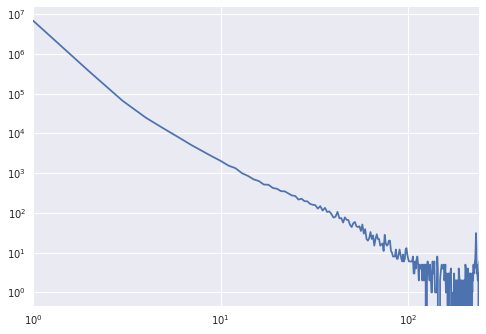

In [15]:
# B plot
import matplotlib.pyplot as plt
import seaborn as sn

df1 = pd.DataFrame.from_dict(data, orient='index')

df1.plot(loglog=True, legend=False)

plt.show()

In [28]:
# C mean
print "The mean found with the built in function is %s." % valuecountframe.mean()

avg = int(sum(pd.to_numeric(valuecountframe["Edits"]))) / len(valuecountframe["Edits"])

print "Manually calculated average is %s." % avg

The mean found with the built in function is Edits    1.153354
dtype: float64.
Manually calculated average is 1.15335371797.


In [29]:
# C median 

print "The median found using the built-in function is %s." % valuecountframe.median()

# Manual test
amount = len(valuecountframe)
medianindex = int(amount/2)
median = valuecountframe.iloc[medianindex]
print "The median found using an index is %s." % median


The median found using the built-in function is Edits    1.0
dtype: float64.
The median found using an index is Edits    1
Name: alex213, dtype: int64.


# N5 

 1. Maak een functie met als input een integer i, dat een dataframe maakt met de kolommen 
> 'taal,taal,aantal editors die in beide talen minstens  i edits hebben gedaan.'

Zorg dat het dataframe omgekeerd gesorteerd is op het aantal editors.
* time je functie voor i=6 en laat de top zien. 
 
### Hints
* denk eens aan een merge
* pas op voor dubbel tellingen: je wilt niet zowel (eng, deu, 14940) als (deu,eng, 14940) in je dataframe hebben zitten
* met `Counter` kan je heel handig tellen.

### Zo moet je output eruit zien:

<table border="1" class="dataframe">
  <thead>
    <tr style="text-align: right;">
      <th></th>
      <th>taal1</th>
      <th>taal2</th>
      <th>aantal_editors</th>
    </tr>
  </thead>
  <tbody>
    <tr>
      <th>15404</th>
      <td>deu</td>
      <td>eng</td>
      <td>34555</td>
    </tr>
    <tr>
      <th>7093</th>
      <td>eng</td>
      <td>fra</td>
      <td>22852</td>
    </tr>
    <tr>
      <th>13069</th>
      <td>eng</td>
      <td>spa</td>
      <td>19043</td>
    </tr>
    <tr>
      <th>3393</th>
      <td>eng</td>
      <td>rus</td>
      <td>12174</td>
    </tr>
    <tr>
      <th>2348</th>
      <td>eng</td>
      <td>ita</td>
      <td>12060</td>
    </tr>
  </tbody>
</table>

In [30]:
# Get list with all languages
languages = df["Taal"].drop_duplicates().tolist()

combos = [i for i in combinations(languages, 2)]

In [31]:
# It gets the right data, but it is too slow to run it on the whole combos list
# My laptop was 5 times slower than the laptop of my partner, so times will hopefully be lower

combos = [('deu', 'eng'), ('eng', 'fra'), ('eng', 'spa'), ('eng', 'rus'), ('eng', 'ita')]
def N5(i):
    # Create empty dataframe to append to
    frame = pd.DataFrame([], columns=["Taal1", "Taal2", "aantal_editors"])
    
    for j in range(len(combos)):
        # Get language combination from combos
        taal1 = combos[j][0]
        taal2 = combos[j][1]
        
        # Query dataframes to have amount of edite bigger then i
        df1 = df.query("Taal == @taal1 & Aantal_edits >= @j")
        df2 = df.query("Taal == @taal2 & Aantal_edits >= @j")

        # Get the length of merged dataframe
        amount_edits = len(df1.merge(df2, how='inner', on='Gebruikersnaam'))
                
        # Create one row dataframe to append to 'frame'
        temp = pd.DataFrame([(taal1, taal2, amount_edits)], 
                            columns=["Taal1", "Taal2", "aantal_editors"])
        
        # Set frame
        frame = frame.append(temp, ignore_index=True)
        
        print (taal1, taal2, amount_edits), "processed"
        
    return frame.sort_values("aantal_editors", ascending=False)
     
%time N5(6)



('deu', 'eng', 106783) processed
('eng', 'fra', 77886) processed
('eng', 'spa', 70383) processed
('eng', 'rus', 40625) processed
('eng', 'ita', 41687) processed
Wall time: 1min 58s


Taal1 Taal2  aantal_editors
0   deu   eng        106783.0
1   eng   fra         77886.0
2   eng   spa         70383.0
4   eng   ita         41687.0
3   eng   rus         40625.0